Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

C:\Users\91808\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data Collection and Processing

In [2]:
df=pd.read_csv("car data.csv")
df.head(11)


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#to check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Checking the distribution of Categorical data

In [6]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Label Encoding the Categorical data

In [7]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
df.head(10) # to check endcoding has been done or not for the categorical columns

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


Model Training and Testing

In [9]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)#axis=1 because we are drop columns
Y=df['Selling_Price']#TARGET VARIABLE

In [10]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [11]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

#training
Linear Regression

In [13]:
lin_reg_model=LinearRegression()

In [14]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [15]:
training_data_prediction=lin_reg_model.predict(X_train)

In [16]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R Squared Error:',error_score*100)

R Squared Error: 87.96483009370216


Visulaize the Actual Prices and Predicted Prices

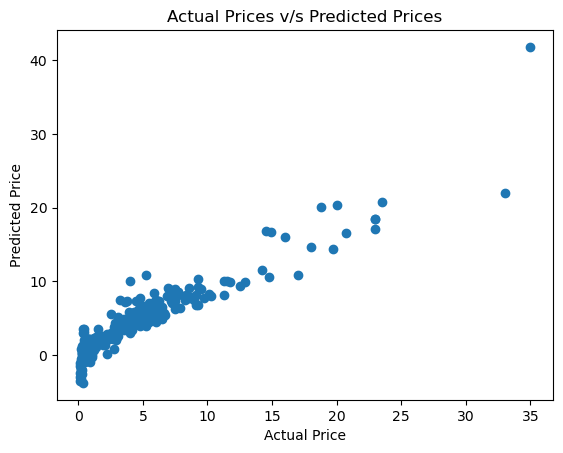

In [17]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices v/s Predicted Prices')
plt.show()

In [18]:
test_data_prediction=lin_reg_model.predict(X_test)

In [19]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Error:',error_score*100)

R Squared Error: 83.65861023209445


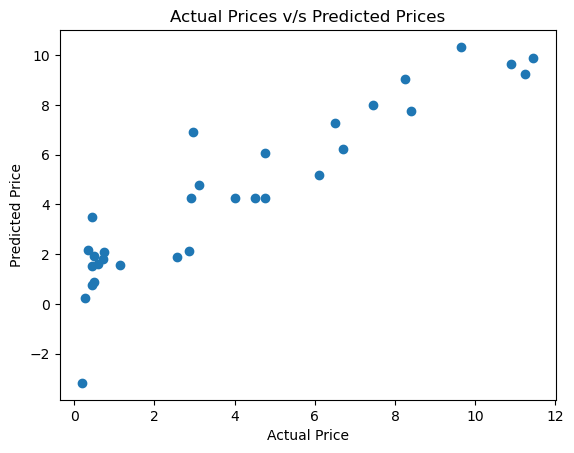

In [20]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices v/s Predicted Prices')
plt.show()

Lasso Regression

In [21]:
lass_reg_model=Lasso()

In [22]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [23]:
training_data_prediction=lass_reg_model.predict(X_train)

In [24]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R Squared Error:',error_score*100)

R Squared Error: 84.2448071824074


Visualize the Actual Prices and Predicted Prices

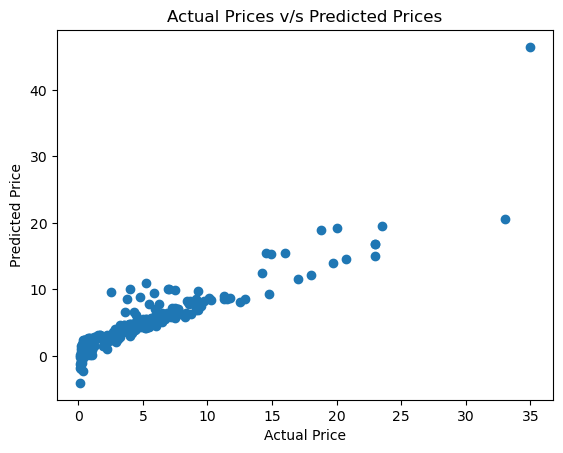

In [25]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices v/s Predicted Prices')
plt.show()

In [26]:
test_data_prediction=lass_reg_model.predict(X_test)

In [27]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Error:',error_score*100)

R Squared Error: 87.09763132343396


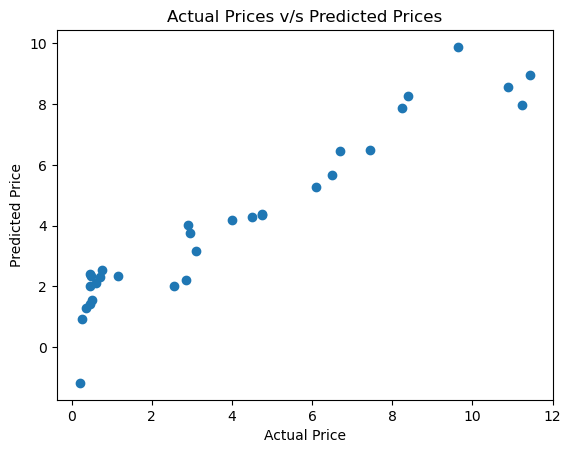

In [28]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices v/s Predicted Prices')
plt.show()